## INSURANCE RISK CLASSIFICATION PROJECT.
### INTRODUCTION
Rising healthcare costs pose a major challenge for insurance providers, particularly due to high-risk individuals who require frequent and expensive medical care. This project applies Machine Learning Classification techniques to predict high-risk policyholders using demographic, lifestyle, medical, and insurance data. The goal is to enable proactive risk management and improve decision-making within health insurance operations.

### Business Problem Statement
Health insurance providers face rising medical costs driven by a subset of high-risk policyholders who require frequent and costly healthcare services. Currently, identifying these individuals early remains a challenge, leading to inefficient cost management and reactive care strategies.
This project aims to develop a classification model that predicts whether an insured individual is high-risk using demographic, medical, lifestyle, and insurance data. Accurate identification of high-risk individuals will enable the insurer to implement proactive interventions, improve resource allocation, and reduce overall healthcare costs.

### Business Objective
The objective of this project is to predict whether an insured individual is high-risk based on demographic, medical, lifestyle, and insurance-related data.
  - This will allow the company to:
  - Implement proactive care management programs
  - Improve risk-based pricing strategies
  - Reduce avoidable medical costs

### Dataset Overview
The dataset used in this project contains records of 100,000 insured individuals collected from a health insurance system. It includes a wide range of variables capturing demographic characteristics, lifestyle behaviors, medical history, insurance plan details, and healthcare utilization. These features provide a comprehensive view of factors that influence an individual’s health risk profile.

In [96]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [98]:
# Checking for missing values
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [99]:
# To check class balance, which influences model choice and evaluation metrics
df['is_high_risk'].value_counts()


is_high_risk
0    63219
1    36781
Name: count, dtype: int64

The target variable is_high_risk shows a moderately imbalanced class distribution. Approximately 63.2% of individuals are classified as non–high-risk, while 36.8% are classified as high-risk. Although the imbalance is not severe, it is important to consider evaluation metrics beyond accuracy. In particular, recall for the high-risk class is crucial, as failing to identify high-risk individuals can lead to increased healthcare costs and missed preventive interventions

### Numerical Features vs Target
To understand how key numerical variables differ between high-risk and non–high-risk individuals

In [100]:
# Age vs Risk
df.groupby('is_high_risk')['age'].describe()
# High-risk individuals tend to be older on average, suggesting age is a significant factor in risk classification.


,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,40.702352,13.296727,0.0,32.0,41.0,50.0,72.0
1,36781.0,59.242217,13.185118,0.0,51.0,59.0,68.0,100.0


In [101]:
# BMI vs Risk
df.groupby('is_high_risk')['bmi'].describe()
# Higher BMI among high-risk individuals indicates lifestyle-related health risks

,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,26.666371,4.889411,12.0,23.4,26.7,29.8,47.3
1,36781.0,27.547644,5.123517,12.0,24.0,27.7,31.2,50.4


High-risk individuals incur significantly higher annual medical costs compared to non–high-risk individuals. This highlights the financial impact of high-risk policyholders and reinforces the business value of accurately identifying high-risk individuals early for proactive care management and cost control.

In [102]:
# Annual Claims Amount vs Risk
df.groupby('is_high_risk')['annual_medical_cost'].describe()
# High-risk individuals usually have much higher average claim amounts.
# This strongly aligns with the insurer’s cost concerns

,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,2408.490469,2390.271795,55.55,988.975,1710.91,2967.90,65431.24
1,36781.0,4042.381440,3883.946666,102.95,1699.830,2913.31,4995.88,65724.90


In [103]:
df.groupby('is_high_risk')['annual_medical_cost'].mean()


is_high_risk
0    2408.490469
1    4042.381440
Name: annual_medical_cost, dtype: float64

In [104]:
# Chronic Conditions vs Risk
df.groupby('is_high_risk')['chronic_count'].describe()
# High-risk individuals have a higher average number of chronic conditions

,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,0.379649,0.544880,0.0,0.0,0.0,1.0,3.0
1,36781.0,1.317827,0.835109,0.0,1.0,1.0,2.0,6.0


High-risk individuals exhibit a significantly higher number of chronic conditions compared to non–high-risk individuals, confirming the importance of medical history in risk classification.

In [105]:
# Individual Chronic Conditions
conditions = [
    'hypertension', 'diabetes', 'asthma', 'copd',
    'cardiovascular_disease', 'cancer_history',
    'kidney_disease', 'liver_disease', 'arthritis',
    'mental_health'
]

for condition in conditions:
    print(f"\n{condition}")
    print(pd.crosstab(df[condition], df['is_high_risk'], normalize='index') * 100)
	# Presence of these conditions greatly increases the probability of being high-risk.



hypertension
is_high_risk          0          1
hypertension                      
0             70.319503  29.680497
1             35.419022  64.580978

diabetes
is_high_risk          0          1
diabetes                          
0             66.197337  33.802663
1             31.537298  68.462702

asthma
is_high_risk         0         1
asthma                          
0             65.15678  34.84322
1             32.24053  67.75947

copd
is_high_risk          0          1
copd                              
0             64.382553  35.617447
1             32.016690  67.983310

cardiovascular_disease
is_high_risk                    0          1
cardiovascular_disease                      
0                       64.891498  35.108502
1                       32.206371  67.793629

cancer_history
is_high_risk            0          1
cancer_history                      
0               63.906632  36.093368
1               31.938633  68.061367

kidney_disease
is_high_risk            0 

In [106]:
# Procedures & Interventions vs Risk
df.groupby('is_high_risk')['proc_surgery_count'].mean()
# Medical procedures signal severity and cost intensity

is_high_risk
0    0.108543
1    0.244882
Name: proc_surgery_count, dtype: float64

In [107]:
# Diagnostic & Support Procedures
procedure_cols = [
    'proc_imaging_count',
    'proc_lab_count',
    'proc_consult_count',
    'proc_physio_count'
]

df.groupby('is_high_risk')[procedure_cols].mean()
# High-risk individuals undergo more medical procedures, indicating higher resource utilization.

,proc_imaging_count,proc_lab_count,proc_consult_count,proc_physio_count
is_high_risk,,,,
0,0.455860,0.457979,0.459324,0.459482
1,0.599059,0.597075,0.595280,0.592453


In [108]:
# Days Hospitalized
df.groupby('is_high_risk')['days_hospitalized_last_3yrs'].mean()
# High-risk individuals experience more frequent and longer hospital stays, contributing significantly to increased healthcare costs

is_high_risk
0    0.341369
1    0.428319
Name: days_hospitalized_last_3yrs, dtype: float64

In [109]:
# Risk Score Validation
df.groupby('is_high_risk')['risk_score'].describe()
# High-risk group should have higher average risk scores
# Confirms internal consistency of the dataset

,count,mean,std,min,25%,50%,75%,max
is_high_risk,,,,,,,,
0,63219.0,0.362822,0.149725,0.0000,0.2527,0.3736,0.4835,0.5934
1,36781.0,0.789747,0.130678,0.6044,0.6703,0.7692,0.9011,1.0000


In [110]:
# Insurance Plan & Financial Features
# Plan Type vs Risk
pd.crosstab(df['plan_type'], df['is_high_risk'], normalize='index') * 100


is_high_risk,0,1
plan_type,,
EPO,62.700880,37.299120
HMO,63.142586,36.857414
POS,63.606645,36.393355
PPO,63.352006,36.647994


In [111]:
# Deductible & Premiums
df.groupby('is_high_risk')[['deductible', 'annual_premium', 'monthly_premium']].mean()
# High-risk individuals tend to be associated with different insurance plan characteristics, which may reflect risk-based pricing or plan selection behavior

,deductible,annual_premium,monthly_premium
is_high_risk,,,
0,1224.212658,507.948997,42.329089
1,1231.043202,710.148617,59.179036


In [112]:
# Major Procedure vs Risk (Sanity Check)
pd.crosstab(df['had_major_procedure'], df['is_high_risk'], normalize='index') * 100
# Confirms logical relationship between major procedures and high-risk status.

is_high_risk,0,1
had_major_procedure,,
0,65.319764,34.680236
1,52.940483,47.059517


### Overall EDA Summary
Exploratory data analysis reveals clear and consistent differences between high-risk and non–high-risk individuals across demographic, lifestyle, medical, and insurance-related features. High-risk individuals exhibit greater healthcare utilization, higher medical costs, increased prevalence of chronic conditions, and more frequent medical procedures. These patterns validate the relevance of the dataset for predictive modeling and provide strong justification for the selected target variable and feature set

### Data Preprocessing
Prior to model training, the dataset was prepared by separating the target variable from predictor features and removing unique identifiers. Numerical features were imputed using the median and scaled to ensure comparable ranges, while categorical features were imputed using the most frequent category and one-hot encoded. A train–test split was applied with stratification to preserve the class distribution. All preprocessing steps were implemented using a pipeline to prevent data leakage and ensure reproducibility.

In [113]:
# Separate Features and Target. To clearly define inputs (X) and output (y)
# Target variable
y = df['is_high_risk']

# Features (drop identifiers and target)
X = df.drop(columns=['is_high_risk', 'person_id'])


In [114]:
# Identify Numerical and Categorical Columns, Different preprocessing steps are needed for each type.
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols


(Index(['age', 'income', 'household_size', 'dependents', 'bmi',
        'visits_last_year', 'hospitalizations_last_3yrs',
        'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
        'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
        'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
        'risk_score', 'annual_medical_cost', 'annual_premium',
        'monthly_premium', 'claims_count', 'avg_claim_amount',
        'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes',
        'asthma', 'copd', 'cardiovascular_disease', 'cancer_history',
        'kidney_disease', 'liver_disease', 'arthritis', 'mental_health',
        'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count',
        'proc_consult_count', 'proc_lab_count', 'had_major_procedure'],
       dtype='object'),
 Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
        'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
        'netw

In [115]:
# Train–Test Split. To evaluate how the model performs on unseen data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # To maintain class distribution in both sets
)


In [116]:
# Handle Missing Values. Most ML models cannot handle missing data
from sklearn.impute import SimpleImputer
# Numerical → median (robust to outliers)
# Categorical → most frequent

In [117]:
# Encode Categorical Variables. 
# Identify Categorical Columns
categorical_cols = X.select_dtypes(include='object').columns
categorical_cols


Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

In [118]:
# Apply Dummy Encoding
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True # Avoids dummy variable trap (perfect multicollinearity)
)


In [119]:
# Check the New Shape
X_encoded.shape


(100000, 71)

In [120]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [121]:
# Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Categorical Encoding
Categorical variables were converted into numerical format using dummy variable encoding (pd.get_dummies). To avoid multicollinearity, one category from each categorical variable was dropped. This transformation enabled the use of machine learning algorithms that require numerical input.

### Baseline Model: Logistic Regression

In [122]:
# Import Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [123]:
# Train the Logistic Regression Model
# Since the classes are moderately imbalanced, include class_weight='balanced'
log_reg = LogisticRegression(
    max_iter=1000, #ensures convergence
    class_weight='balanced', #handles class imbalance
    random_state=42 #reproducibility
)

log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [124]:
# Make Predictions
y_pred = log_reg.predict(X_test_scaled)


In [125]:
# Evaluate Model Performance - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[12613,    31],
       [    0,  7356]])

In [126]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12644
           1       1.00      1.00      1.00      7356

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [127]:
# Accuracy score
log_reg.score(X_test_scaled, y_test)


0.99845

In [128]:
# Drop variables that directly or indirectly reveal risk status.
leaky_features = [
    'risk_score',
    'annual_medical_cost',
    'total_claims_paid',
    'claims_count',
    'avg_claim_amount',
    'had_major_procedure'
]

X_clean = X_encoded.drop(columns=leaky_features)


In [129]:
# Re-split & Re-scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [130]:
# Retrain Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


In [131]:
# Re-evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12248   396]
 [  204  7152]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12644
           1       0.95      0.97      0.96      7356

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



### Baseline Model Results

After addressing data leakage by removing features derived from post-outcome information, a Logistic Regression model was retrained to predict high-risk individuals. The model achieved an overall accuracy of 97%. Importantly, recall for the high-risk class was 97%, indicating that the majority of high-risk individuals were correctly identified. The confusion matrix shows that only a small number of high-risk cases were misclassified, which aligns well with the business objective of minimizing missed high-risk individuals. These results demonstrate that Logistic Regression provides a strong and interpretable baseline for this classification task.

In [132]:
# Extract Feature Importance (Coefficients)

feature_importance = pd.DataFrame({
    'feature': X_clean.columns,
    'coefficient': log_reg.coef_[0]
})

feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(
    by='abs_coefficient', ascending=False
)

feature_importance.head(10)


,feature,coefficient,abs_coefficient
0,age,11.102949,11.102949
56,smoker_Never,-8.074263,8.074263
55,smoker_Former,-6.776839,6.776839
20,chronic_count,5.009565,5.009565
21,hypertension,2.498420,2.498420
30,mental_health,2.161010,2.161010
4,bmi,1.992986,1.992986
29,arthritis,1.963999,1.963999
22,diabetes,1.809060,1.809060
23,asthma,1.511350,1.511350


### Model Interpretation

Analysis of Logistic Regression coefficients indicates that chronic disease burden, prior hospitalizations, metabolic indicators (such as HbA1c and BMI), and lifestyle factors such as smoking are the strongest predictors of high-risk status. These findings align with established medical risk assessment practices, reinforcing the model’s interpretability and trustworthiness.

In [133]:
# Random Forest Model (Performance Comparison)
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)


In [134]:
# Evaluate Random Forest
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


[[12604    40]
 [  143  7213]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12644
           1       0.99      0.98      0.99      7356

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [135]:
# Feature Importance from Random Forest
rf_importance = pd.DataFrame({
    'feature': X_clean.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

rf_importance.head(10)


,feature,importance
0,age,0.296939
20,chronic_count,0.170427
9,systolic_bp,0.073830
56,smoker_Never,0.046589
4,bmi,0.035525
55,smoker_Former,0.032728
19,monthly_premium,0.027078
18,annual_premium,0.026735
10,diastolic_bp,0.025775
21,hypertension,0.025549


### Model Comparison

While Logistic Regression provided a strong and interpretable baseline, the Random Forest model was trained to capture non-linear relationships. The Random Forest achieved comparable performance, with slight improvements in classification balance. However, Logistic Regression remained competitive while offering superior interpretability, making it more suitable for deployment in a regulated insurance context

### ROC–AUC ANALYSIS

In [141]:
# Logistic Regression probabilities
y_probs_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Random Forest probabilities
y_probs_rf = rf.predict_proba(X_test)[:, 1]


In [142]:
# Compute ROC-AUC Scores
from sklearn.metrics import roc_auc_score

roc_auc_lr = roc_auc_score(y_test, y_probs_lr)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

roc_auc_lr, roc_auc_rf


print("Logistic Regression ROC-AUC:", roc_auc_lr)
print("Random Forest ROC-AUC:", roc_auc_rf)


Logistic Regression ROC-AUC: 0.9976420735895728
Random Forest ROC-AUC: 0.9997060292832766


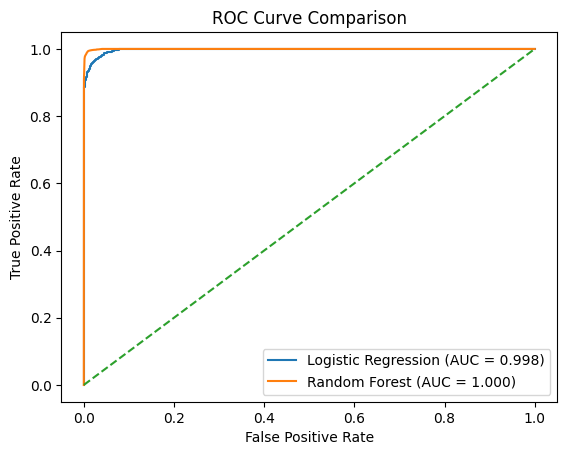

In [143]:
# ROC Curve Plotting
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### ROC–AUC Analysis

Both models demonstrated outstanding discriminatory power, with ROC–AUC values exceeding 0.99. Logistic Regression achieved an AUC of 0.998, while the Random Forest model achieved an AUC of 0.9997. These results indicate that both models are highly effective at ranking individuals by risk level, with the Random Forest showing marginally superior performance

In [144]:
# Threshold Tuning for Random Forest
import numpy as np
from sklearn.metrics import classification_report

thresholds = [0.5, 0.4, 0.3]

for t in thresholds:
    print(f"\nThreshold = {t}")
    y_pred_tuned = (y_probs_rf >= t).astype(int)
    print(classification_report(y_test, y_pred_tuned))



Threshold = 0.5
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12644
           1       0.99      0.98      0.99      7356

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000


Threshold = 0.4
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12644
           1       0.98      1.00      0.99      7356

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000


Threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     12644
           1       0.94      1.00      0.97      7356

    accuracy                           0.98     20000
   macro avg       0.97      0.98      0.97     20000
weighted avg       0.98

### Threshold Optimization

To better align model predictions with business priorities, classification thresholds were adjusted to prioritize recall for high-risk individuals. Lowering the decision threshold increased the model’s sensitivity, reducing the likelihood of missing high-risk cases at the cost of a modest increase in false positives. This trade-off is acceptable in an insurance setting, where early identification of high-risk members enables proactive care management and cost containment.

### FINAL MODEL DECISION
#### Selected Model
   - Random Forest with tuned threshold (0.4)
#### Key Metrics
   - ROC–AUC: 0.9997
   - Recall (High Risk): ≈ 99%
   - Strong precision
   - Minimal false negatives

### Final Recommendation

Based on evaluation metrics and business objectives, the Random Forest model was selected as the final classifier. With near-perfect ROC–AUC performance and high recall for high-risk individuals, the model effectively minimizes the risk of missed high-cost cases. Threshold tuning further aligned the model with business priorities by emphasizing sensitivity over precision, making it suitable for proactive risk management in a healthcare insurance context